# HW2 Technical: Shaders and WebGL

For this assignment, you'll be learning about GLSL and the rasterization pipeline through WebGL!
The coding component of this homework includes the following steps:
* Warmup 1: switch the normal shader from flat shading to smooth shading (2 line change)
* Warmup 2: change the normal shader to do vertex computations instead of fragment computations (<5 line change)
* __[Deliverable 1] Switch to the bunny model and render with the vertex-based normal shader. [1 point]__
* Switch from the normal shader to the phong shader (which only has ambient color implemented.)
* __[Deliverable 2] Implement the diffuse component and render the bunny model. [2 points]__
* __[Deliverable 3] Implement the specular component and render the bunny model. [1 point]__
* __[Deliverable 4] Answer the questions at the end. [1 point]__


In [22]:
#DO NOT EDIT
import os, sys, glob
import cv2
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

def show_images(regex:str, height:float=12, width:float=12, num_columns=3):
    filenames=glob.glob(regex)
    if len(filenames)==0:
        raise IOError(f"files of the form {regex} do not exist! Make sure you saved your images correctly.")
    filenames.sort()
    num_rows=(len(filenames)+num_columns-1)//num_columns
    fig,axes=plt.subplots(num_rows,num_columns,gridspec_kw={'wspace':0, 'hspace':0})
    for i,filename in enumerate(filenames):
        img=cv2.imread(filename)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        
        y,x=divmod(i,num_columns)
        ax=axes[y][x]
        ax.grid(None)
        ax.axis("off")
        ax.imshow(img)
    fig.set_size_inches((width,height))
    plt.show()
    
def show_image(filename:str, height:float=12, width:float=12):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        
    plt.gca().grid(None)
    plt.gca().axis("off")
    plt.imshow(img)
    plt.gcf().set_size_inches((width,height))
    plt.show()

def print_file(file_type, filename):
    print(f"\033[94;1;255m### {file_type} ###\033[0m")
    with open(filename, "r") as fp:
        lines=fp.readlines()
    lines=[line.rstrip() for line in lines]
    for line in lines:
        print(line)
    
def print_shader_code(shader):
    print_file("VERTEX_SHADER", f"src/shaders/{shader}_vert.js")
    print_file("FRAGMENT_SHADER", f"src/shaders/{shader}_frag.js")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


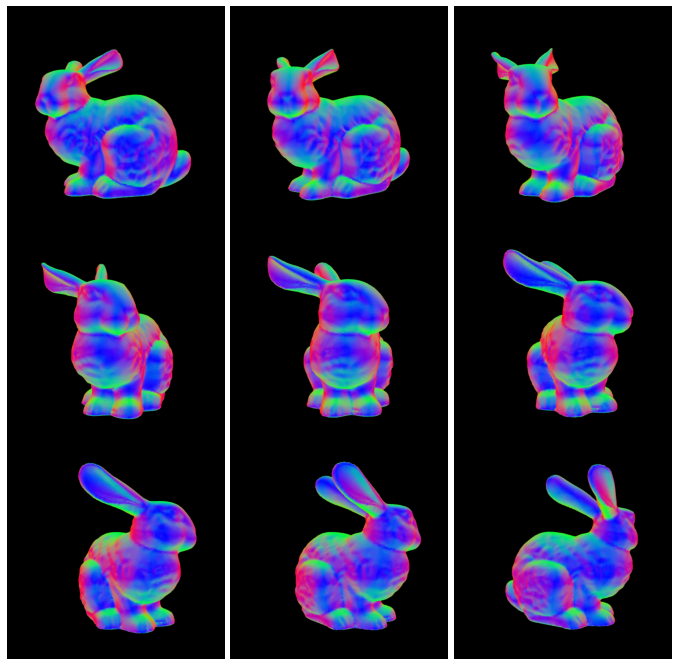

### VERTEX_SHADER ###
export default `#version 300 es
    precision highp float;
    precision highp int;

    in vec4 aVertexPosition;
    in vec4 aVertexNormal;

    uniform mat4 uMeshToWorldMatrix;
    uniform mat4 uMeshToWorldRotMatrix;
    uniform mat4 uWorldToClipSpaceMatrix;

    out vec4 vNormal;

void main(void) {
  // set vertex normal (to be passed to fragment shader)
  vNormal = uMeshToWorldRotMatrix * aVertexNormal;
  vNormal = vec4(normalize(abs(vNormal.xyz)),1.0);

  // set world space vertex position
  vec4 vPosition = uMeshToWorldMatrix * aVertexPosition;

  //openGL reads the clipping space coordinates from gl_Position
  gl_Position = uWorldToClipSpaceMatrix * vPosition;
}
`
### FRAGMENT_SHADER ###
export default `#version 300 es
    precision highp float;
    precision highp int;
    in vec4 vNormal;
    out vec4 fragColor;

    void main(void) {
        // compute color from interpolated normal
        // vec4 vColor = vec4(normalize(abs(vNormal.xyz)),1.0);
        

In [23]:
## WebGL Shader I: move the color computation to the vertex shader (1 pt)
show_images("images/hw2_normals_*.png")
print_shader_code("starter")

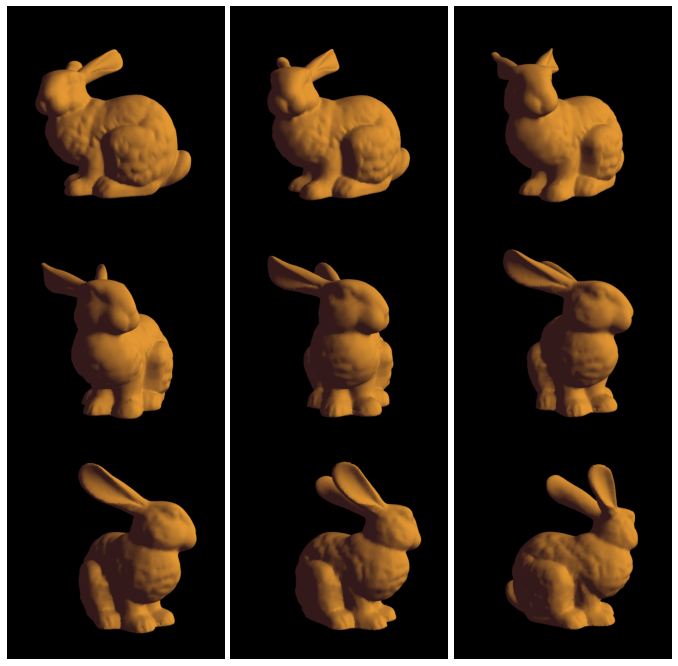

In [24]:
## WebGL Shader II: Implement diffuse component of the phong shader (2 pts)
show_images("images/hw2_diffuse_*.png")

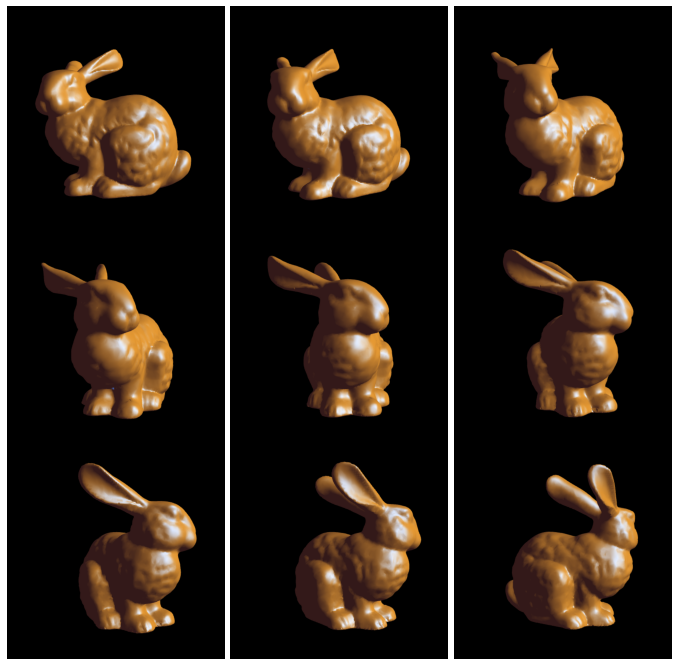

### VERTEX_SHADER ###
export default `#version 300 es
    precision highp float;
    precision highp int;

    in vec4 aVertexPosition;
    in vec4 aVertexNormal;

    uniform mat4 uMeshToWorldMatrix;
    uniform mat4 uMeshToWorldRotMatrix;
    uniform mat4 uWorldToClipSpaceMatrix;

    out vec3 vPosition;
    out vec3 vNormal;

void main(void) {
  vPosition = (uMeshToWorldMatrix * aVertexPosition).xyz;
  vNormal = (uMeshToWorldRotMatrix * aVertexNormal).xyz;
  gl_Position = (uWorldToClipSpaceMatrix * uMeshToWorldMatrix * aVertexPosition);
}
`
### FRAGMENT_SHADER ###
export default `#version 300 es
    precision highp float;
    precision highp int;

    in vec3 vPosition;
    in vec3 vNormal;

    uniform vec4 uAmbientColor;
    uniform vec4 uDiffuseColor;
    uniform vec4 uSpecularColor;
    // TODO: pass in diffuse and specular too
    uniform vec4 uLightColor;
    uniform vec3 uLightPosition;

    out vec4 fragColor;

    // Hint: see page 8 (and bottom of page 7)
    // of https:/

In [25]:
## WebGL Shader III: implement specular component of the phong shader (1 pt)
show_images("images/hw2_specular*.png")
print_shader_code("phong")

### WebGL Questions
* Question 1: Why does the normal shader (starter_vert.js, starter_frag.js) shade the surfaces that are "facing us directly" blue? Hint: start by explaining the OpenGL coordinate system.

$$\hat{n}\approx(0,0,1)\ \text{(Blue)}$$

* Question 2: Look at where the ambient/diffuse/specular material properties of the mesh is defined in the code. If you wanted a purple bunny that has blue-ish highlights instead of a brown, how might you set the individual properties? Give a specific example with RGB values for each of the three components. There's no single correct answer. Hint: you can test it on your shader code. Also remember that the colors are aggregated. i.e. the darkest colors are $k_a$, the brightest colors possible are $k_a+k_d+k_s$. 
($k_a,k_d,k_s$ are colors with RGBA values between 0 and 1.)

## HW2 Practical: Cameras and Materials
The blender component of this homework includes the following steps:
* __[Deliverable 1]__ Render the scene with different focal lengths and observe the qualitative difference (1 pt)
* __[Deliverable 2]__ Add 2 objects to your scene with a ground plane, set the camera so that both objects are visible and within image boundaries (2 pts), and render with the principled BSDF material, setting the 2 objects to have different material properties (2 pts).




## Camera focal length

* What do you observe when you double the focal length and simultaneously double the camera distance from the target object? 
A few sentences should suffice.

In [ ]:
show_image("images/camera_100.png")

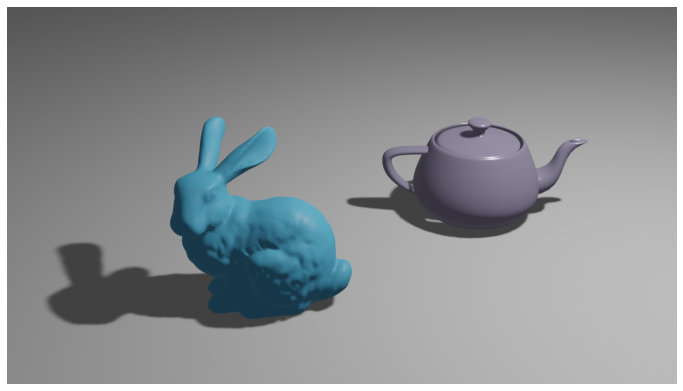

In [14]:
## Use BRDF on two objects in Eevee (2)
show_image("images/eevee0001.png")